Use decision trees to prepare a model on fraud data : treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
import sklearn 
from sklearn.model_selection import train_test_split  , KFold , cross_val_score,  GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore') 

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
#Loading dataset
data = pd.read_csv('Fraud_check.csv')
data.head() 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


**Feature Engineering**

In [6]:
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

data1 = data.copy()

list = []
for i in range (0, len(data)):
    if data['Taxable.Income'][i] <= 30000:
        list.append('Risky')
    elif data['Taxable.Income'][i] > 30000:
        list.append('Good')

data1['loan_asset_type'] = list

data1 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,loan_asset_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
data1.loan_asset_type.value_counts()

Good     476
Risky    124
Name: loan_asset_type, dtype: int64

**Data Visualization**

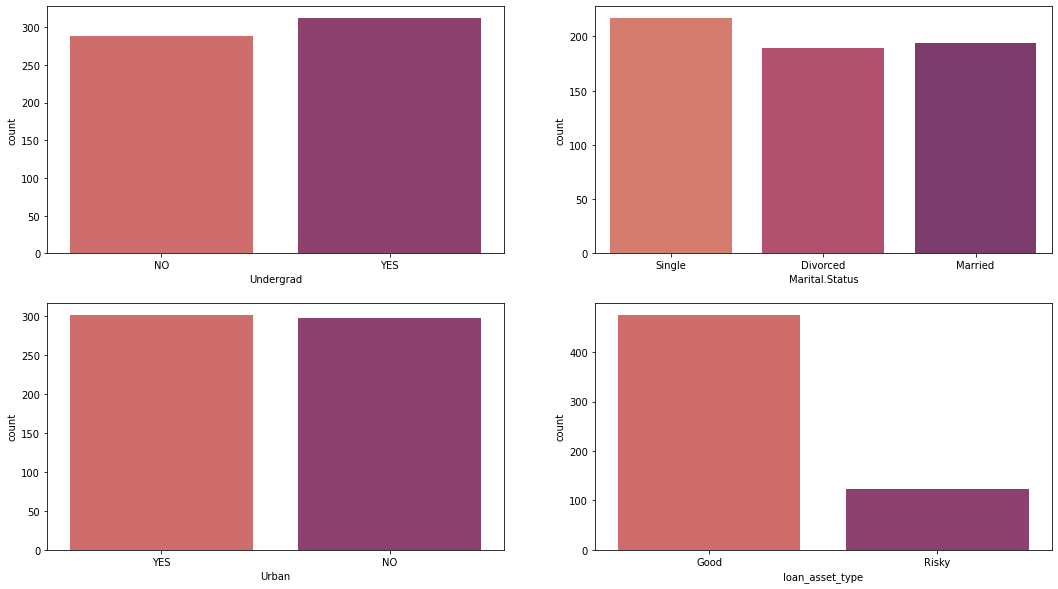

In [8]:
#countplot for categorical variables
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(data1['Undergrad'], palette='flare')
plt.subplot(2,2,2)
sns.countplot(data1['Marital.Status'], palette='flare')

plt.subplot(2,2,3)
sns.countplot(data1['Urban'], palette='flare')
plt.subplot(2,2,4)
sns.countplot(data1['loan_asset_type'], palette='flare')

plt.show()

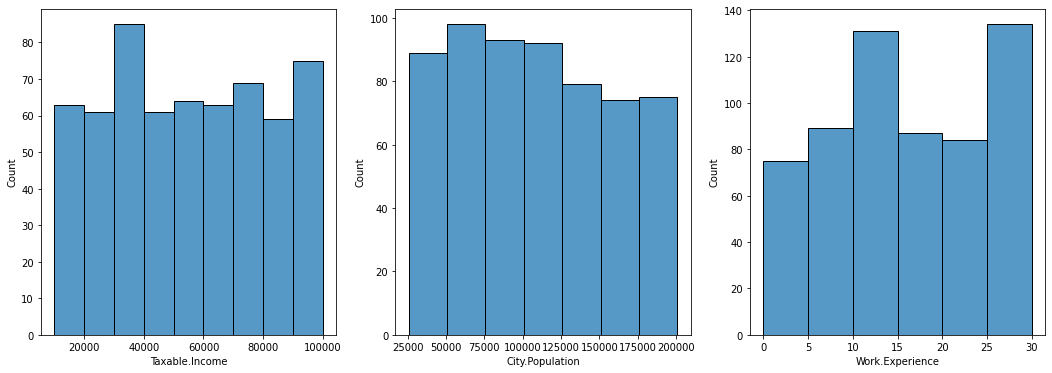

In [9]:
#Histogram for continuous variables

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(data1['Taxable.Income'], bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))

plt.subplot(1,3,2)
sns.histplot(data1['City.Population'], bins=range(min(data1['City.Population']), max(data1['City.Population']) + 25000, 25000))

plt.subplot(1,3,3)
sns.histplot(data1['Work.Experience'], bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5) ) 

plt.show()


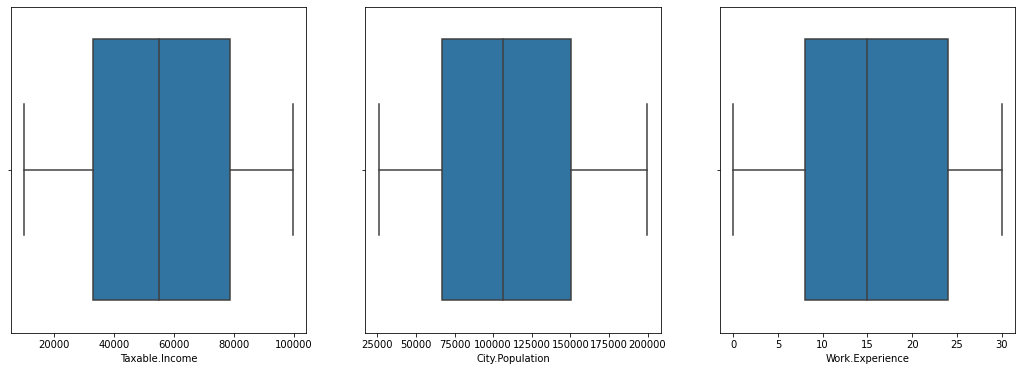

In [10]:
# Box plot for outlier detection
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(data1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(data1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(data1['Work.Experience'] ) 

plt.show()

# No outliers 

**Univariate Analysis**

In [11]:
loan_asset_risky=pd.DataFrame()
loan_asset_good=pd.DataFrame()

loan_asset_risky = data1.loc[data1['loan_asset_type']=='Risky']

loan_asset_good = data1.loc[data1['loan_asset_type']=='Good']

**Taxable income wrt fraud**

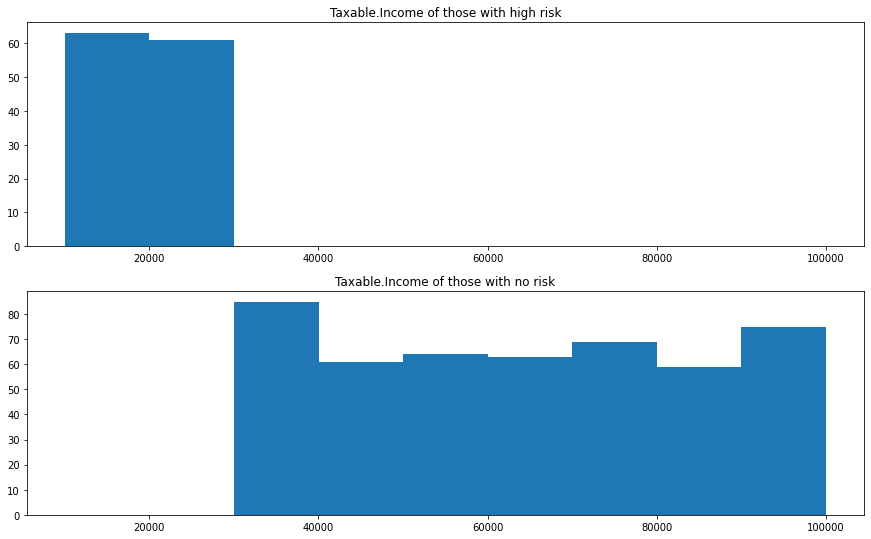

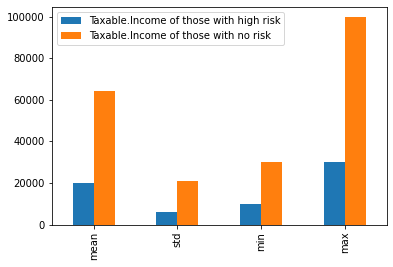

In [12]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['Taxable.Income'], bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['Taxable.Income'],  bins=range(min(data1['Taxable.Income']), max(data1['Taxable.Income']) + 10000, 10000))
plt.title('Taxable.Income of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['Taxable.Income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['Taxable.Income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show() 

**Work.Experience wrt fraud**

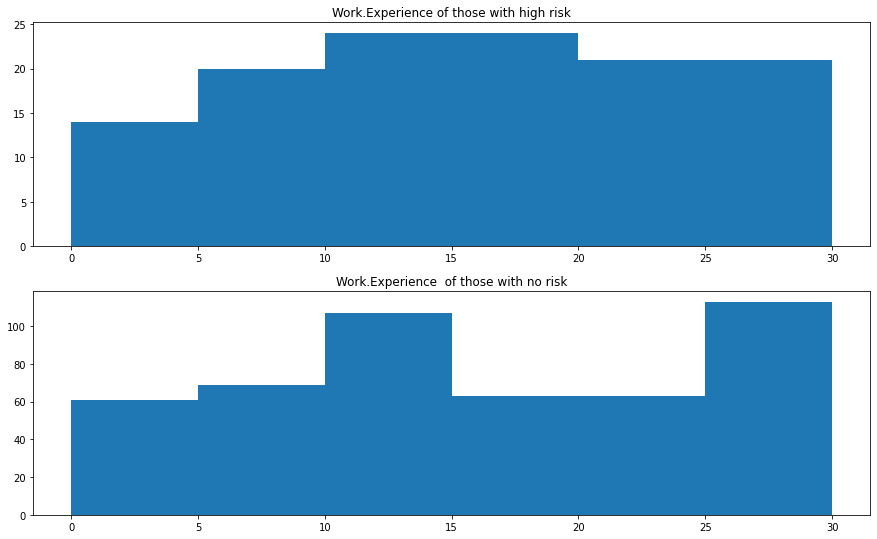

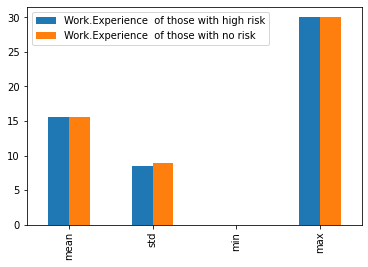

In [13]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['Work.Experience'], bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['Work.Experience'],  bins=range(min(data1['Work.Experience']), max(data1['Work.Experience']) + 5, 5))
plt.title('Work.Experience  of those with no risk',)



exp_describe = pd.DataFrame()

exp_describe['Work.Experience  of those with high risk'] = loan_asset_risky['Work.Experience'].describe()
exp_describe['Work.Experience  of those with no risk'] = loan_asset_good['Work.Experience'].describe()
exp_describe = exp_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show() 
 

**Undergrad edu wrt fraud**

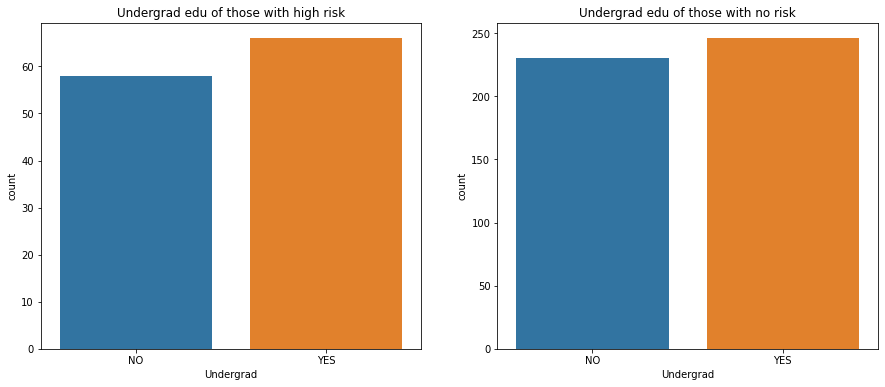

In [14]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(loan_asset_risky['Undergrad'])
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(loan_asset_good['Undergrad'])
plt.title('Undergrad edu of those with no risk',)

plt.show()

**Marital status vs fraud**

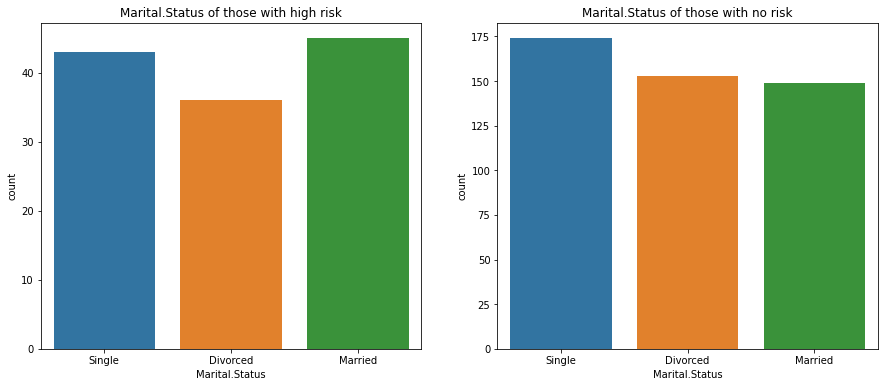

In [15]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(loan_asset_risky['Marital.Status'])
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(loan_asset_good['Marital.Status'])
plt.title('Marital.Status of those with no risk',)

plt.show()

**Residence vs fraud**

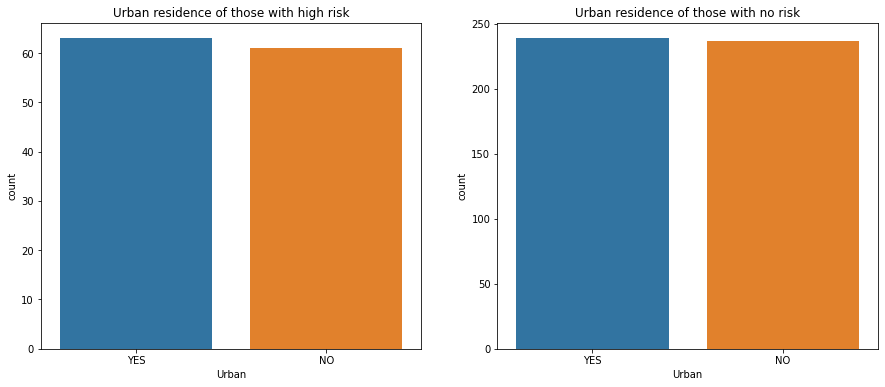

In [16]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(loan_asset_risky['Urban'])
plt.title('Urban residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(loan_asset_good['Urban'])
plt.title('Urban residence of those with no risk',)

plt.show()


**Data Preprocessing**

In [17]:
data2 = data1.copy()
data2 = data2.rename(columns={'Undergrad':'undergrad' , 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income', 'City.Population':'city_population', 'Work.Experience': 'workxp', 'Urban':'urban'})
data2.drop('taxable_income', axis=1, inplace=True)

In [18]:
data2.head()

,undergrad,marital_status,city_population,workxp,urban,loan_asset_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [19]:
# encoding categorical variables
#but technique to encode input cat variable and output cat variable is different.
#so lets split data into x and y 

In [20]:
x = data2.drop('loan_asset_type', axis=1)
y = data2['loan_asset_type']

In [21]:
x = pd.get_dummies(x) # encoding input categorical variables

In [22]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [23]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [24]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (480, 9)
Shape of X_test:  (120, 9)
Shape of y_train:  (480,)
Shape of y_test (120,)


**Building Decision Tree Classifier**

a) using Entropy Criteria with train test split

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
pd.crosstab(y_test,preds) 
# getting the 2 way table to understand the correct and wrong predictions

col_0,0
row_0,
0,92
1,28


In [28]:
# Accuracy 
np.mean(preds==y_test) 

0.7666666666666667

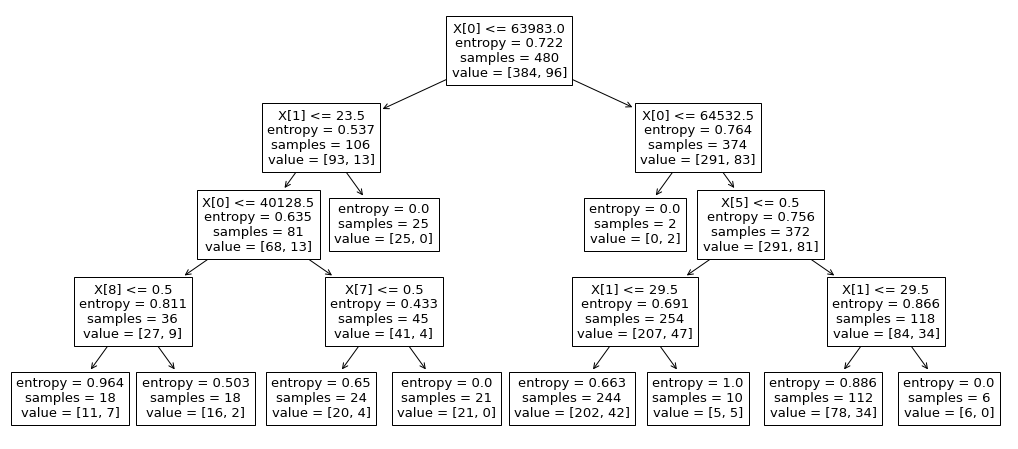

In [29]:
plt.figure(figsize=(18,8)) 
tree.plot_tree(model)
plt.show()

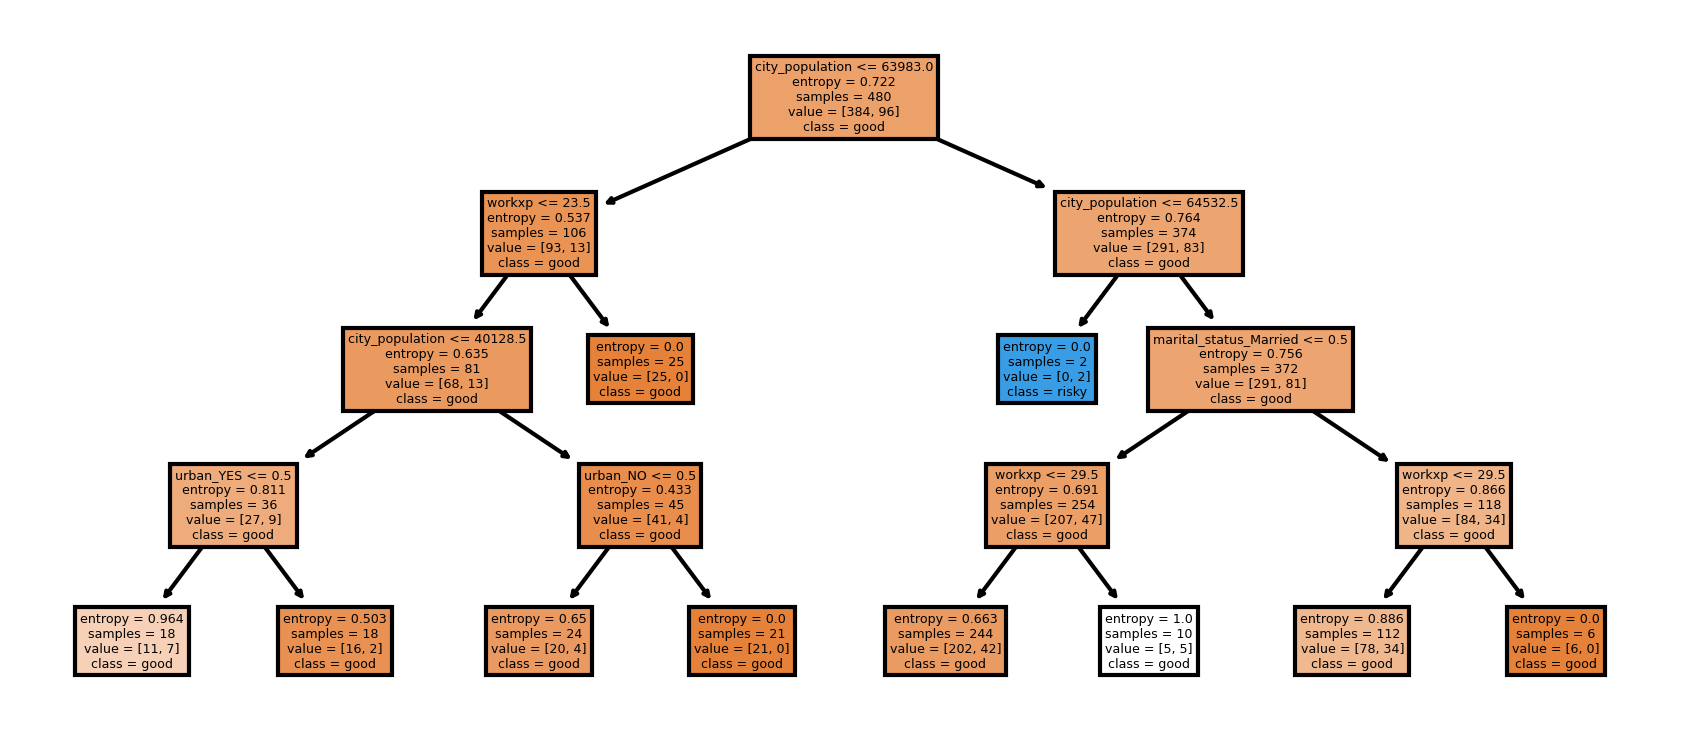

In [30]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

b) using Gini Criteria with train test split

In [31]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4) 
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=4)

In [34]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)

preds_gini = model_gini.predict(x_test) # predicting on test data set 
preds_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
np.mean(preds_gini==y_test) 

0.7583333333333333

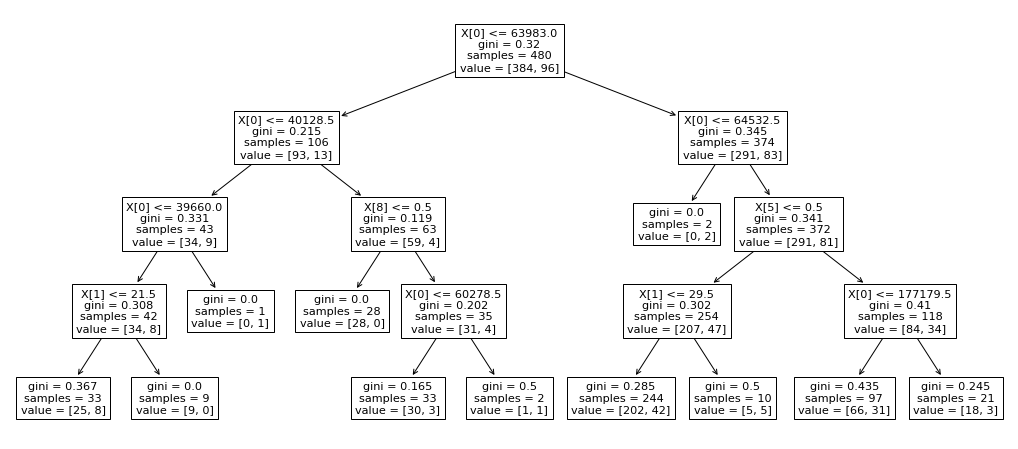

In [36]:
plt.figure(figsize=(18,8))
tree.plot_tree(model_gini)
plt.show()

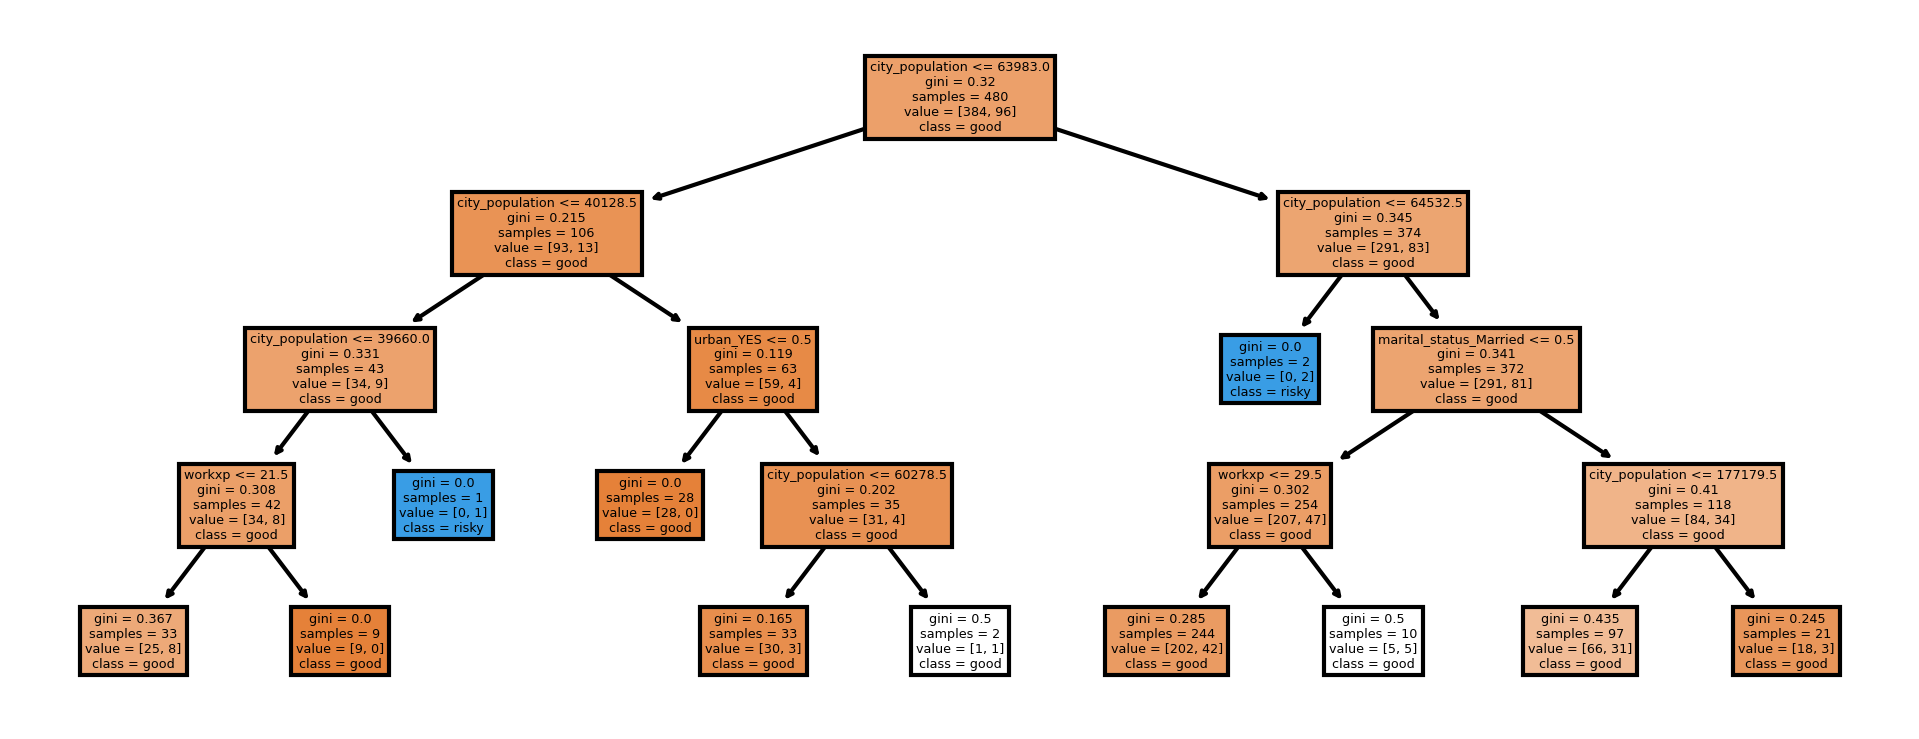

In [37]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,3), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);


c) Grid search for hyper parameter tuning

In [38]:
kfold = KFold(n_splits=10, shuffle=True)  
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}
DT = DecisionTreeClassifier()
grid = GridSearchCV(DT, param_grid=param_dict, cv=kfold)

grid.fit(x, y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [39]:
print(grid.best_score_)
print(grid.best_params_) 

0.7933333333333332
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}


**d) Building final model on grid.best_params_ parameters**

In [47]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)  

In [48]:
model_kf = grid.best_estimator_
model_kf.fit(x,y)


results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))  

Accuracy with k fold validation 0.793


In [49]:
model = grid.best_estimator_
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred))

Accuracy with train test split: 0.7666666666666667


In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



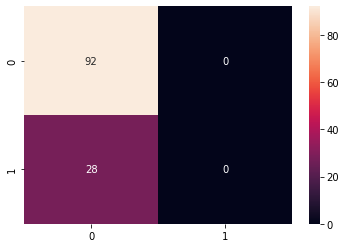

In [51]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

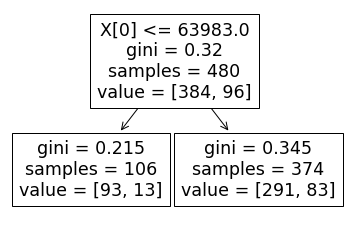

In [52]:
#PLot the decision tree
tree.plot_tree(model_kf)

plt.show()

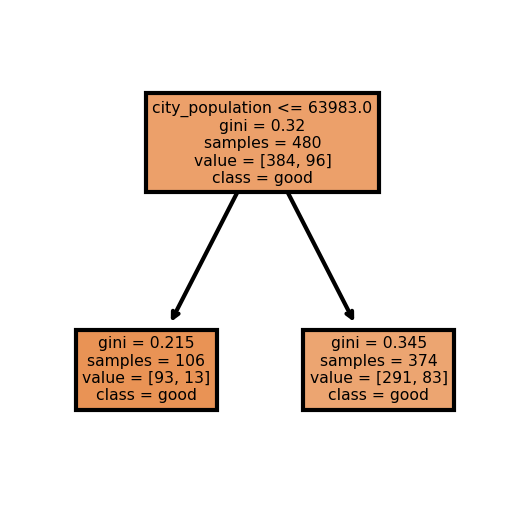

In [53]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model_kf,
               feature_names = fn, 
               class_names=cn,
               filled = True);